<a href="https://colab.research.google.com/github/soufianeze/Projet_certification_Bloc_n_3/blob/main/Bloc_n%C2%B03_Walmart_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
# Importation des bibliothèques necessaires pour le projet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from numpy import arange
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from functions import *
from sklearn.model_selection import learning_curve
import datetime
from sklearn.model_selection import train_test_split

In [213]:
# Obtenir le fichier Walmart_Store_sales.csv à partir de mon espace GITHUB
! wget = 'https://raw.githubusercontent.com/soufianeze/MachineLearning2/main/Walmart_Store_sales.csv'

--2022-07-18 19:29:49--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-07-18 19:29:49--  https://raw.githubusercontent.com/soufianeze/MachineLearning2/main/Walmart_Store_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8749 (8.5K) [text/plain]
Saving to: ‘Walmart_Store_sales.csv.25’

Walmart_Store_sales 100%[===================>]   8.54K  --.-KB/s    in 0s      

2022-07-18 19:29:49 (60.1 MB/s) - ‘Walmart_Store_sales.csv.25’ saved [8749/8749]

FINISHED --2022-07-18 19:29:49--
Total wall clock time: 0.2s
Downloaded: 1 files, 8.5K in 0s (60.1 MB/s)


In [214]:
# Charger le dataset et afficher les 50 premières lignes
df = pd.read_csv('Walmart_Store_sales.csv', sep = ',')
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [215]:
original_df = df.copy(deep=True)

# EDA : Exploratory Data Analysis

In [216]:
# Statistiques des variables 
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


In [217]:
# dimension de la dataset
df.shape

(150, 8)

In [218]:
# dimension de la dataset
df.shape

(150, 8)

In [219]:
# Pourcentage des valeurs manquantes
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Store            0.00
Date            12.00
Weekly_Sales     9.33
Holiday_Flag     8.00
Temperature     12.00
Fuel_Price       9.33
CPI              8.00
Unemployment    10.00
dtype: float64

In [220]:
# Type de variables
for col in df.columns:
  print(f'{col :-<50}  {df[col].dtypes}')

Store---------------------------------------------  float64
Date----------------------------------------------  object
Weekly_Sales--------------------------------------  float64
Holiday_Flag--------------------------------------  float64
Temperature---------------------------------------  float64
Fuel_Price----------------------------------------  float64
CPI-----------------------------------------------  float64
Unemployment--------------------------------------  float64


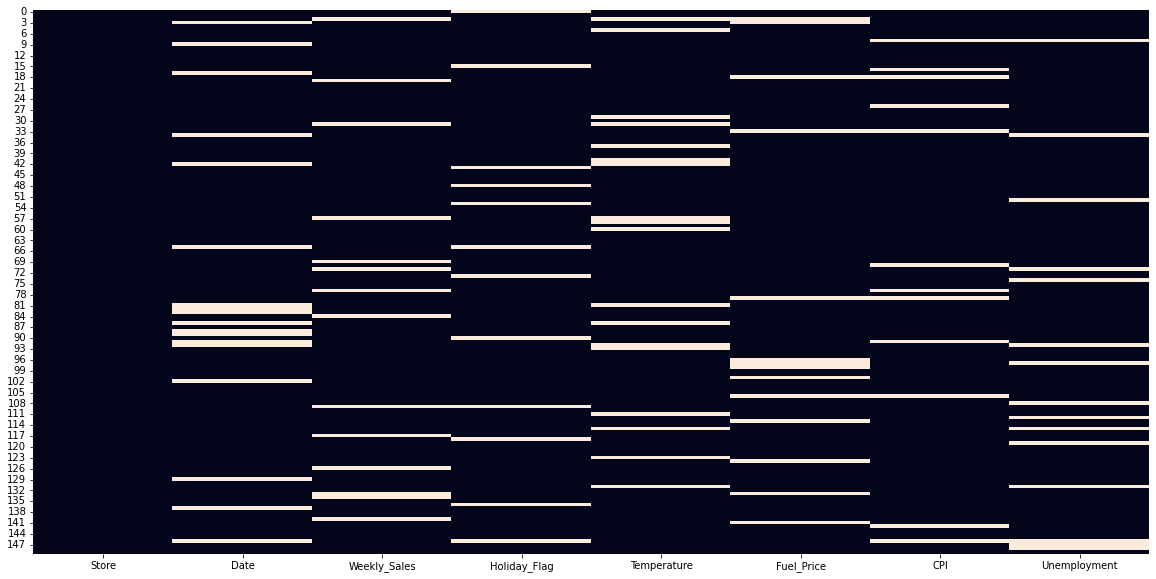

In [221]:
# L'emplacement des valurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False);

In [222]:
# Remplacement des valeurs manquates par la median de chaque variable
missing_col = ['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']

for i in missing_col:
  df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

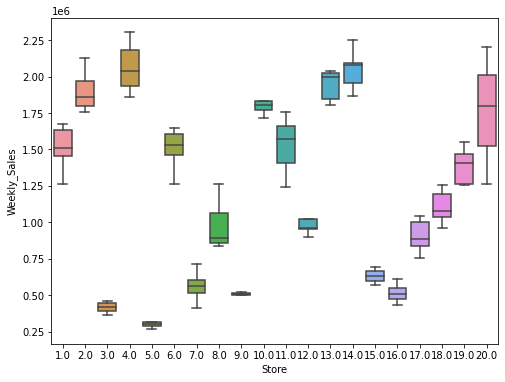

In [223]:
# Ventes hebdomadaires par boutique
data = pd.concat([df['Store'], df['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False)

On constate que le nombre des ventes hebdomadaires est très important chez les boutiques 20, 13, 14, 4 2

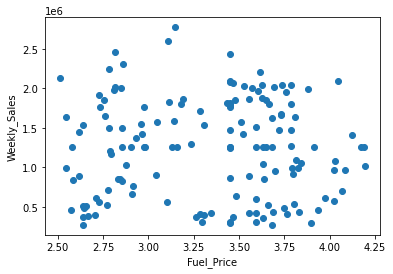

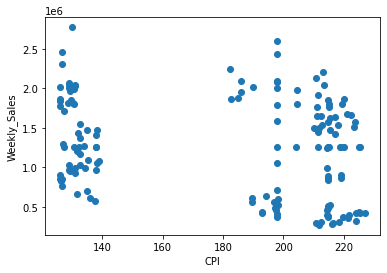

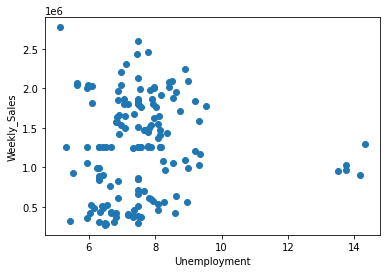

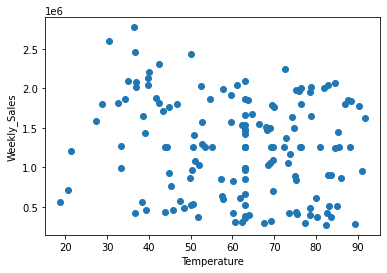

In [224]:
# Graphiques des ventes hebdomadaires par rapport aux Fuel_Price, CPI, Unemployment, Temperature
scatter(df, 'Fuel_Price')
scatter(df, 'CPI')
scatter(df, 'Unemployment')
scatter(df, 'Temperature')


# Preprocessing

In [225]:
# Remplacement des valeurs manquates par la mediam de chaque variable
missing_col = ['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']

for i in missing_col:
  df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

In [226]:
df.isnull().sum()

Store            0
Date            18
Weekly_Sales     0
Holiday_Flag     0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
dtype: int64

In [227]:
# Supression des lignes avec des valeurs manquantes
df = df.dropna(axis = 0, how = 'any')

In [175]:
# Dimension de la dataset
df.shape

(132, 8)

In [228]:
# Extraire l'année, le mois et le jour à partir de la date

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['dayofweek'] = pd.DatetimeIndex(df['Date']).dayofweek

[ X
ˉ
 −3σ, 
X
ˉ
 +3σ].

In [229]:
# Borne INF et borne SUP pour chaque variable afin d'éliminer les valeurs aberants 

BI_Temperature = round(df['Temperature'].mean() - 3*df['Temperature'].std(),2)
BS_Temperature =round(df['Temperature'].mean() + 3*df['Temperature'].std(),2)

BI_Fuel_Price = round(df['Fuel_Price'].mean() - 3*df['Fuel_Price'].std(),2)
BS_Fuel_Price =round(df['Fuel_Price'].mean() + 3*df['Fuel_Price'].std(),2)


BI_CPI = round(df['CPI'].mean() - 3*df['CPI'].std(),2)
BS_CPI =round(df['CPI'].mean() + 3*df['CPI'].std(),2)


BI_Unemployment = round(df['Unemployment'].mean() - 3*df['Unemployment'].std(),2)
BS_Unemployment =round(df['Unemployment'].mean() + 3*df['Unemployment'].std(),2)

In [230]:
# Garder les valeurs qui respectent l'interval
df[(df['Temperature'] > BI_Temperature) | (df['Temperature'] < BS_Temperature)]
df[(df['Fuel_Price'] > BI_Fuel_Price) | (df['Fuel_Price'] < BS_Fuel_Price)]
df[(df['CPI'] > BI_CPI) | (df['CPI'] < BS_CPI)]
df[(df['Unemployment'] > BI_Unemployment) | (df['Unemployment'] < BS_Unemployment)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,dayofweek
0,6.0,18-02-2011,1572117.540,0.0,59.610,3.045,214.777523,6.858,2011,2,18,4
1,13.0,25-03-2011,1807545.430,0.0,42.380,3.435,128.616064,7.470,2011,3,25,4
2,17.0,27-07-2012,1261423.865,0.0,62.985,3.451,130.719581,5.936,2012,7,27,4
4,6.0,28-05-2010,1644470.660,0.0,78.890,2.759,212.412888,7.092,2010,5,28,4
5,4.0,28-05-2010,1857533.700,0.0,62.985,2.756,126.160226,7.896,2010,5,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.080,0.0,73.440,3.594,226.968844,6.034,2012,10,19,4
145,14.0,18-06-2010,2248645.590,0.0,72.620,2.780,182.442420,8.899,2010,6,18,4
147,17.0,11-06-2010,845252.210,0.0,57.140,2.841,126.111903,7.470,2010,11,6,5
148,8.0,12-08-2011,856796.100,0.0,86.050,3.638,219.007525,7.470,2011,12,8,3


In [231]:
# Codification de la variable Store
dummies  = pd.get_dummies(data=df, columns=['Store'])
dummies = dummies.drop(['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment','year','month','day','dayofweek'], axis = 1)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 149
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Store_1.0   132 non-null    uint8
 1   Store_2.0   132 non-null    uint8
 2   Store_3.0   132 non-null    uint8
 3   Store_4.0   132 non-null    uint8
 4   Store_5.0   132 non-null    uint8
 5   Store_6.0   132 non-null    uint8
 6   Store_7.0   132 non-null    uint8
 7   Store_8.0   132 non-null    uint8
 8   Store_9.0   132 non-null    uint8
 9   Store_10.0  132 non-null    uint8
 10  Store_11.0  132 non-null    uint8
 11  Store_12.0  132 non-null    uint8
 12  Store_13.0  132 non-null    uint8
 13  Store_14.0  132 non-null    uint8
 14  Store_15.0  132 non-null    uint8
 15  Store_16.0  132 non-null    uint8
 16  Store_17.0  132 non-null    uint8
 17  Store_18.0  132 non-null    uint8
 18  Store_19.0  132 non-null    uint8
 19  Store_20.0  132 non-null    uint8
dtypes: uint8(20)
memory usage: 3.6 K

In [233]:
# Sélection des variables numériaues
X_numerical = df.drop(['Store', 'Date'], axis=1).astype('float64')
list_numerical = X_numerical.columns
list_numerical

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')

In [234]:
# Définir y
y = df['Weekly_Sales']

In [184]:
# Définir X
X = df.drop(['Weekly_Sales','Date',], axis= 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         132 non-null    float64
 1   Holiday_Flag  132 non-null    float64
 2   Temperature   132 non-null    float64
 3   Fuel_Price    132 non-null    float64
 4   CPI           132 non-null    float64
 5   Unemployment  132 non-null    float64
 6   year          132 non-null    int64  
 7   month         132 non-null    int64  
 8   day           132 non-null    int64  
 9   dayofweek     132 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 11.3 KB


In [236]:
# Regrouper toutes les variables
X = pd.concat([X_numerical, dummies[['Store_1.0', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0',
       'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0',
       'Store_11.0', 'Store_12.0', 'Store_13.0', 'Store_14.0', 'Store_15.0',
       'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 149
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  132 non-null    float64
 1   Holiday_Flag  132 non-null    float64
 2   Temperature   132 non-null    float64
 3   Fuel_Price    132 non-null    float64
 4   CPI           132 non-null    float64
 5   Unemployment  132 non-null    float64
 6   year          132 non-null    float64
 7   month         132 non-null    float64
 8   day           132 non-null    float64
 9   dayofweek     132 non-null    float64
 10  Store_1.0     132 non-null    uint8  
 11  Store_2.0     132 non-null    uint8  
 12  Store_3.0     132 non-null    uint8  
 13  Store_4.0     132 non-null    uint8  
 14  Store_5.0     132 non-null    uint8  
 15  Store_6.0     132 non-null    uint8  
 16  Store_7.0     132 non-null    uint8  
 17  Store_8.0     132 non-null    uint8  
 18  Store_9.0     132 non-null    

In [237]:
# Diviser le dataset en X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [238]:
# Standariser les variables numériques

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Modélisation

In [239]:
# Tableau des 3 modèles utilisés LinearRegression, Ridge, Lasso

result = compare_models(
    list_of_models = [linear_model.Ridge(alpha=0.09),LinearRegression(),Lasso()],
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test,
    list_of_metrics = [mean_absolute_error, r2_score, mean_squared_error]
)

In [240]:
result.T

,Ridge,LinearRegression,Lasso
TRAIN_mean_absolute_error,1081.889,0.0,0.852
TRAIN_r2_score,1.000,1.0,1.000
TRAIN_mean_squared_error,2247179.863,0.0,1.000
TEST_mean_absolute_error,1461.367,0.0,0.895
TEST_r2_score,1.000,1.0,1.000
TEST_mean_squared_error,3379309.634,0.0,1.136


In [60]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, list_of_metrics):
  # entrainement du modele
  model.fit(X_train, y_train)

  # le dictionnaire qui va contenir les scores
  dict_of_scores = {}

  # evaluate model on Train_set on all metrics

  y_pred = model.predict(X_train)
  for metric in list_of_metrics:
    dict_of_scores[f'TRAIN_{metric.__name__}'] = np.round(metric(y_train, y_pred), 3)


  # evaluate model on Test_set on all metrics
  y_pred = model.predict(X_test)
  for metric in list_of_metrics:
    dict_of_scores[f'TEST_{metric.__name__}'] = np.round(metric(y_test, y_pred), 3)


  return pd.Series(dict_of_scores)


In [61]:
def compare_models(list_of_models, X_train, X_test, y_train, y_test, list_of_metrics):
  list_of_scores = []
  for model in list_of_models:
    scores = train_and_evaluate(model, X_train, X_test, y_train, y_test, list_of_metrics)
    scores.name = model.__class__.__name__
    list_of_scores.append(scores)

  df = pd.concat(list_of_scores, axis=1)
  df = df.T
  df = df.sort_values(by='TEST_r2_score', ascending=False)
  return df


# Validation LEARNING CURVE

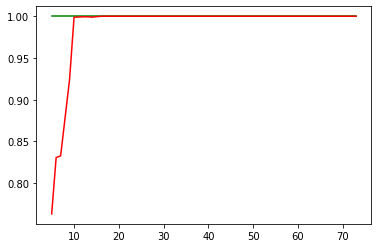

In [64]:
training_sizes, training_scores, validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(5, len(X_train) * 0.8, dtype = int), 
    cv = 5
)
line1, line2 = plt.plot(
    training_sizes, training_scores.mean(axis = 1), 'g', 
    training_sizes, validation_scores.mean(axis = 1), 'r');

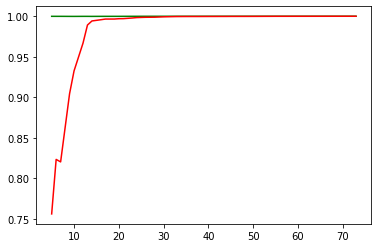

In [65]:
training_sizes, training_scores, validation_scores = learning_curve(
    estimator = linear_model.Ridge(alpha=0.09),
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(5, len(X_train) * 0.8, dtype = int), 
    cv = 5
)
line1, line2 = plt.plot(
    training_sizes, training_scores.mean(axis = 1), 'g', 
    training_sizes, validation_scores.mean(axis = 1), 'r')

In [208]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)